In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Definição da amostra

In [170]:
popu = pd.read_csv("Popu_series.csv")
popu = popu.sample(frac=0.3, replace=False, random_state=195)
len(popu)

97

In [171]:
popu = popu['serie']
popu

146                            The Chosen One
95                                    Osmosis
173                                  Puerta 7
106                           Holiday Secrets
204                                Mindhunter
                        ...                  
28                              Sex Education
230                          The English Game
85                            Paava Kadhaigal
233                                  Homemade
264    Trailer Park Boys Out of the Park: USA
Name: serie, Length: 97, dtype: object

In [172]:
popu.to_csv("Amostra.csv", index=False)

# Análise Exploratória

In [173]:
#imdb = pd.read_csv("imdb_series.csv") REMOVER (arquivo da amostra antiga)
imdb = pd.read_csv("Amostra_IMDB.csv")
twitter = pd.read_csv("series_dataset_count/dataset_count.csv")
reviews = pd.read_csv("UserReviewsCritic.csv", sep=";")

In [174]:
reviews.head()

,Titulo,user_reviews,critic_reviews
0,The Chosen One,27,5
1,Osmosis,50,10
2,Puerta 7,14,4
3,Holiday Secrets,7,5
4,Mindhunter,867,115


In [175]:
twitter.dropna(inplace=True)

In [176]:
twitter

,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal,IMDBid
0,The Chosen One,2019-06-28,419.0,472.0,1111.0,2002.0,9048368
1,Osmosis,2019-03-29,936.0,937.0,1959.0,3832.0,7043380
2,Puerta 7,2020-02-21,280.0,514.0,907.0,1701.0,9170386
3,Holiday Secrets,2019-11-20,13.0,49.0,93.0,155.0,11243536
4,Mindhunter,2017-10-13,4980.0,7459.0,30394.0,42833.0,5290382
...,...,...,...,...,...,...,...
92,Sex Education,2019-01-11,2204.0,13414.0,44564.0,60182.0,7767422
93,The English Game,2020-03-20,0.0,1.0,5.0,6.0,8403664
94,Paava Kadhaigal,2020-12-18,366.0,577.0,325.0,1268.0,13206988
95,Homemade,2020-06-30,142.0,180.0,232.0,554.0,12574336


In [177]:
imdb.head()

,Titulo,Check,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Reviews,Ano,Data de estréia,Roteiristas,Censura,País,Idiomas,Episodios
0,The Chosen One,tv series,9048368,5.8,636.0,"Renan Tenca, Paloma Bernardi, Gutto Szuster, P...","Mystery, Thriller",40.0,25.0,2019.0,2019-06-28,"Pablo Cruz, Raphael Draccon, Raphael Draccon","Argentina:16, Brazil:16, Germany:16::(self-app...",Brazil,Portuguese,6.0
1,Osmosis,tv series,7043380,5.8,2851.0,"Agathe Bonitzer, Hugo Becker, Gaël Kamilindi, ...","Romance, Sci-Fi",55.0,24.0,2019.0,2019-03-29,"Gabriel Chiche, Louis Chiche, William Chiche","Brazil:16::(self-applied), France:13::(self-ap...",France,French,8.0
2,Puerta 7,tv series,9170386,5.7,516.0,"Dolores Fonzi, Esteban Lamothe, Carlos Belloso...","Crime, Drama, Thriller",45.0,14.0,2020.0,2020-02-21,"Patricio Vega, Martin Zimmerman, Martin Zimmerman","Argentina:18, Australia:M, Philippines:18+::(s...",Argentina,Spanish,8.0
3,Holiday Secrets,tv mini series,11243536,6.5,1032.0,"Corinna Harfouch, Christiane Paul, Svenja Jung...",Drama,NaN,7.0,2019.0,2019-11-20,Katharina Eyssen,"Argentina:13, Singapore:PG13",Germany,German,3.0
4,Mindhunter,tv series,5290382,8.6,246759.0,"Jonathan Groff, Holt McCallany, Anna Torv, Son...","Crime, Drama, Thriller",60.0,25.0,2017.0,2017-10-13,"John Douglas, Mark Olshaker, Joe Penhall","Argentina:16, Australia:MA15+::(Netflix self-r...",United States,English,10.0


In [178]:
reviews.rename(columns={"titulo":"Titulo"}, inplace=True)
aux = pd.merge(imdb, twitter, on = "IMDBid")
dados = pd.merge(aux, reviews, on = "Titulo")

#dados.drop(dados[dados["Nome"]=="LoveDeathandRobots"].index, inplace=True)
dados.head()

,Titulo,Check,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Reviews,Ano,...,Idiomas,Episodios,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal,user_reviews,critic_reviews
0,The Chosen One,tv series,9048368,5.8,636.0,"Renan Tenca, Paloma Bernardi, Gutto Szuster, P...","Mystery, Thriller",40.0,25.0,2019.0,...,Portuguese,6.0,The Chosen One,2019-06-28,419.0,472.0,1111.0,2002.0,27,5
1,Osmosis,tv series,7043380,5.8,2851.0,"Agathe Bonitzer, Hugo Becker, Gaël Kamilindi, ...","Romance, Sci-Fi",55.0,24.0,2019.0,...,French,8.0,Osmosis,2019-03-29,936.0,937.0,1959.0,3832.0,50,10
2,Puerta 7,tv series,9170386,5.7,516.0,"Dolores Fonzi, Esteban Lamothe, Carlos Belloso...","Crime, Drama, Thriller",45.0,14.0,2020.0,...,Spanish,8.0,Puerta 7,2020-02-21,280.0,514.0,907.0,1701.0,14,4
3,Holiday Secrets,tv mini series,11243536,6.5,1032.0,"Corinna Harfouch, Christiane Paul, Svenja Jung...",Drama,NaN,7.0,2019.0,...,German,3.0,Holiday Secrets,2019-11-20,13.0,49.0,93.0,155.0,7,5
4,Mindhunter,tv series,5290382,8.6,246759.0,"Jonathan Groff, Holt McCallany, Anna Torv, Son...","Crime, Drama, Thriller",60.0,25.0,2017.0,...,English,10.0,Mindhunter,2017-10-13,4980.0,7459.0,30394.0,42833.0,867,115


In [179]:
dados.drop(columns="Reviews", inplace=True)

In [180]:
indice = dados[dados['Duração']>100]['Duração'].index

In [181]:
dados.loc[indice, "Duração"] = dados.loc[indice, "Duração"]/dados.loc[indice, "Episodios"]

In [182]:
dados[dados['Duração']>100]

,Titulo,Check,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Ano,Data de estréia,...,Idiomas,Episodios,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal,user_reviews,critic_reviews


In [183]:
dados['Data de estréia'] = pd.to_datetime(dados['Data de estréia'], format="%Y-%m-%d", errors = 'coerce')
dados['mes'] = pd.DatetimeIndex(dados['Data de estréia']).month

# Análise Exploratória

In [184]:
teste = dados[dados['Duração'].notna()]

In [202]:
#dados.apply(lambda linha: linha['Duração'] if linha['Duração']<100 else linha['Duração']/linha['Episodios'])
#dados.apply(lambda linha: print(linha[7]))
#a = teste.apply(lambda linha: print(linha[0]))
#dados['Duração']

#duracao = dados['Duração']
#epi = dados['Episodios']


0     False
1     False
2     False
3      True
4     False
      ...  
81    False
82    False
83    False
84    False
85    False
Name: Duração, Length: 86, dtype: bool

## Nota

<AxesSubplot:xlabel='Nota', ylabel='Count'>

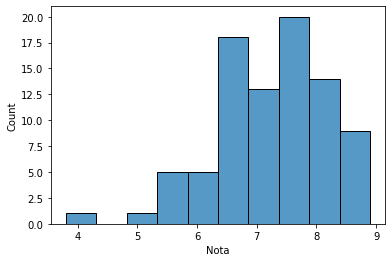

In [ ]:
sns.histplot(data=dados, x="Nota")

<AxesSubplot:ylabel='Nota'>

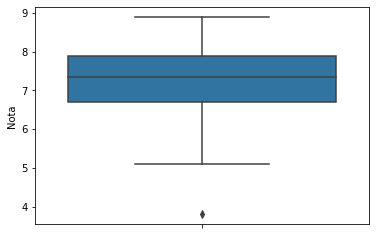

In [ ]:
sns.boxplot(y=dados['Nota'], data=dados)

In [ ]:
dados.groupby

<AxesSubplot:xlabel='Ano', ylabel='Nota'>

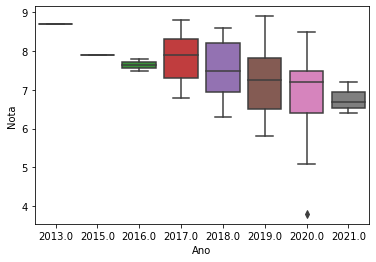

In [ ]:
sns.boxplot(x=dados['Ano'],y=dados['Nota'], data=dados)

In [ ]:
y = []
coluna = []
for i in range (24,dados.columns.size,1):
    coluna.append(str(dados.columns[i]))
    
    aux = []
    for j in range (0, len(dados[dados[coluna[-1]] == 1]['Nota']),1):
        aux.append(dados[dados[coluna[-1]] == 1]['Nota'].values[j])
        
    y.append(aux)

In [ ]:
colunas = {'Nota':[], 'Gênero':[]}
df_aux = pd.DataFrame(colunas)

for i in range(len(y)):
    for val in y[i]:
        linha = {'Nota':val, 'Gênero':coluna[i]}
        df_aux = df_aux.append(linha, ignore_index=True)

In [ ]:
df_aux

,Nota,Gênero
0,7.3,Adventure
1,8.5,Adventure
2,7.4,Adventure
3,6.8,Adventure
4,6.8,Adventure
...,...,...
224,7.4,Thriller
225,7.4,Thriller
226,7.6,Thriller
227,7.5,Western


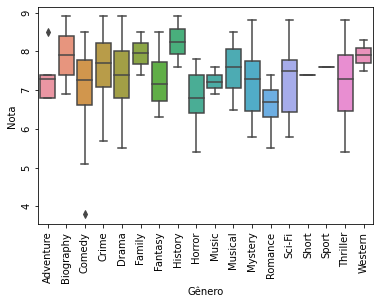

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x='Gênero',y='Nota', data=df_aux)
ax.tick_params(rotation=90)

#fig, ax = plt.subplots()
#sns.barplot(x = x, y = df['log_disaster'], palette="Blues_d")
#ax.tick_params(rotation=90)
#ax.set_title('Número de Desastres por Ano')
##ax.set_ylabel('Número de Desastres')
#ax.set_xlabel('Ano')
#fig.set_size_inches(20, 5)

In [ ]:
#["Mystery" in linha for linha in dados['Gênero']]
#plt.boxplot(dados[dados['Mystery']==1]['Nota'].describe())#.plot()
#plt.boxplot(dados[dados['Drama']==1]['Nota'].describe())#.plot()
#dados[dados['Drama']==1]['Nota'].describe()#.plot()

In [ ]:
#dados[dados['Drama']==1]['Nota'].count()

69

In [ ]:
#type(dados['Gênero'].apply(lambda x: x)[0])

list

In [ ]:
#dados['Gênero'] = dados['Gênero'].apply(lambda x : x.split(", "))
#dados['Gênero']


In [ ]:
dummies = pd.get_dummies(dados['Gênero'].apply(pd.Series).stack()).sum(level=0)
# Primeiramente: Fazer o count, ver a frequencia de cada série
# Segundamente: Avaliar os grupos mais frequentes (Drama+Comedia)

In [ ]:
len(dados)

86

In [ ]:
dados = dados.join(dummies)

In [ ]:
#dados[colunas = 25:45].equals(dummies)

In [ ]:
dados.iloc[:, 24:].sum()
dados.iloc[:, 24:].sum()*100/86

Action       12.790698
Adventure     5.813953
Biography     2.325581
Comedy       39.534884
Crime        27.906977
Drama        80.232558
Family        2.325581
Fantasy      13.953488
History       2.325581
Horror        8.139535
Music         3.488372
Musical       3.488372
Mystery      17.441860
Romance      10.465116
Sci-Fi       11.627907
Short         1.162791
Sport         2.325581
Thriller     31.395349
Western       2.325581
dtype: float64

In [ ]:
dados.columns

Index(['Titulo', 'Check', 'IMDBid', 'Nota', 'Votos', 'Elenco', 'Gênero',
       'Duração', 'Reviews', 'Ano', 'Data de estréia', 'Roteiristas',
       'Censura', 'País', 'Idiomas', 'Episodios', 'Nome', 'DataEstreia',
       'CountPre', 'CountDurante', 'CountPos', 'CountTotal', 'user_reviews',
       'critic_reviews', 'Action', 'Adventure', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller',
       'Western'],
      dtype='object')

In [ ]:
dados.columns[24]

'Action'

### Nota do IMDB e número de votos por engajamento por engajamento

In [ ]:
#dados['Nota'] CountPre CountDurante CountPos CountTotal

sns.scatterplot(data=dado, x="Nota", y="CountTotal")

In [ ]:
sns.scatterplot(data=dados, x="Nota", y="CountTotal")#, hue=dados['País'])

In [ ]:
sns.boxplot(data=dados, x="Nota", y="País")#, hue=dados['País'])

In [ ]:
sns.boxplot(data=dados, x="Episodios", y="Nota")

In [ ]:
sns.boxplot(data=dados, x="Check", y="Nota")

In [ ]:
sns.scatterplot(data=dados, x="Nota", y="CountPre")

In [ ]:
sns.scatterplot(data=dados, x="Nota", y="CountDurante")

In [ ]:
sns.scatterplot(data=dados, x="Nota", y="CountPos")

In [ ]:
dados.corr(method='pearson')
#dados.corr(method='spearman')

,IMDBid,Nota,Votos,Duração,Ano,Episodios,CountPre,CountDurante,CountPos,CountTotal,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,Western
IMDBid,1.000000,-0.438873,-0.543804,-0.219106,0.852411,-0.384553,-0.479329,-0.596080,-0.364468,-0.482506,...,0.103555,-0.021814,0.107694,0.002316,0.164807,-0.336371,-0.000389,0.003843,-0.010006,-0.216646
Nota,-0.438873,1.000000,0.481724,0.243358,-0.410434,0.070388,0.206121,0.405380,0.476275,0.476569,...,-0.136808,0.001835,0.063598,0.001119,-0.243512,0.006120,0.020623,0.062757,-0.015175,0.112885
Votos,-0.543804,0.481724,1.000000,0.262867,-0.559226,0.147458,0.467113,0.740705,0.636127,0.712633,...,-0.044052,-0.088508,-0.086997,0.099417,-0.111138,0.247586,-0.050138,-0.051163,0.100023,0.020435
Duração,-0.219106,0.243358,0.262867,1.000000,-0.136125,-0.276558,0.232535,0.309825,0.328476,0.338625,...,0.099983,0.079319,-0.024514,0.311941,0.064691,0.231598,NaN,0.029710,0.339066,0.027897
Ano,0.852411,-0.410434,-0.559226,-0.136125,1.000000,-0.417665,-0.408439,-0.507547,-0.304749,-0.406723,...,0.051782,0.099924,0.142466,0.035879,0.128689,-0.239543,0.081279,0.115629,0.019166,-0.246916
Episodios,-0.384553,0.070388,0.147458,-0.276558,-0.417665,1.000000,0.191909,0.160133,0.119649,0.157592,...,-0.041929,-0.023769,-0.065916,-0.108413,-0.080638,-0.001122,0.046553,-0.036395,-0.009591,0.245815
CountPre,-0.479329,0.206121,0.467113,0.232535,-0.408439,0.191909,1.000000,0.774767,0.423803,0.659854,...,0.000555,-0.012927,-0.059889,-0.001368,0.004977,0.448281,-0.030019,-0.057721,0.176628,0.008721
CountDurante,-0.596080,0.405380,0.740705,0.309825,-0.507547,0.160133,0.774767,1.000000,0.624508,0.813774,...,-0.003724,-0.060946,-0.085040,0.035970,-0.085937,0.376173,-0.023458,-0.078038,0.075205,-0.000911
CountPos,-0.364468,0.476275,0.636127,0.328476,-0.304749,0.119649,0.423803,0.624508,1.000000,0.952900,...,-0.061725,-0.097131,0.272465,0.091022,-0.050722,0.217217,-0.042465,-0.034404,0.033697,-0.024843
CountTotal,-0.482506,0.476569,0.712633,0.338625,-0.406723,0.157592,0.659854,0.813774,0.952900,1.000000,...,-0.046781,-0.087370,0.175210,0.075075,-0.054442,0.322016,-0.042076,-0.052287,0.073267,-0.017131


In [ ]:
dados.corr(method='spearman')

In [ ]:
sns.scatterplot(data=dados, x="Ano", y="CountTotal")

In [ ]:
sns.scatterplot(data=dados, x="Ano", y="Votos")

In [ ]:
dados[dados['Ano']==2013]

In [ ]:
sns.scatterplot(data=dados, x="Votos", y="CountTotal")

In [ ]:
sns.scatterplot(data=dados, x="Nota", y="Votos")

## Votos

<AxesSubplot:xlabel='Votos', ylabel='Count'>

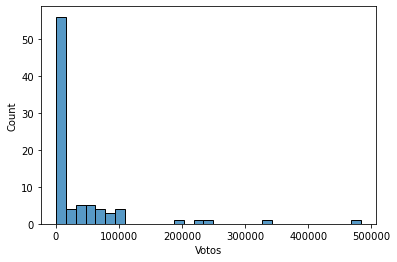

In [ ]:
# 120000 - 20000 - 2500
sns.histplot(data=dados, x="Votos")#, log_scale=True)

<AxesSubplot:ylabel='Votos'>

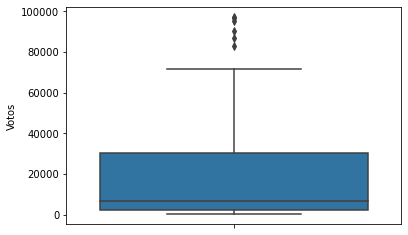

In [ ]:
sns.boxplot(data=dados[dados["Votos"] < 100000], y='Votos')

<AxesSubplot:xlabel='Nota', ylabel='Votos'>

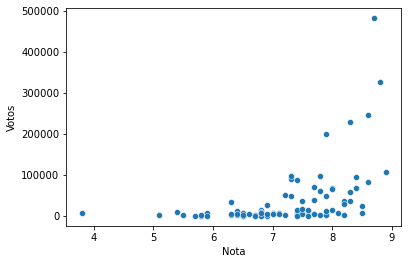

In [ ]:
sns.scatterplot(data=dados, x="Nota", y="Votos")

<AxesSubplot:xlabel='Ano', ylabel='Votos'>

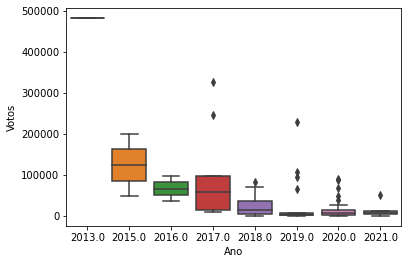

In [ ]:
sns.boxplot(data=dados, x="Ano", y="Votos")

<AxesSubplot:xlabel='Votos', ylabel='País'>

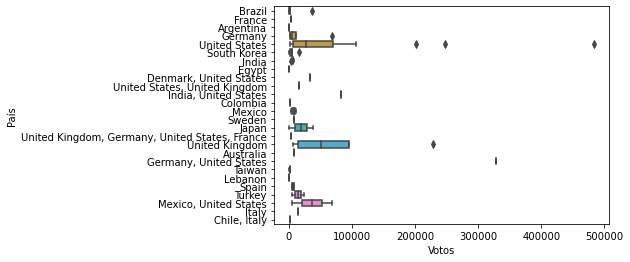

In [ ]:
sns.boxplot(data=dados, x="Votos", y="País")

<AxesSubplot:xlabel='Episodios', ylabel='Votos'>

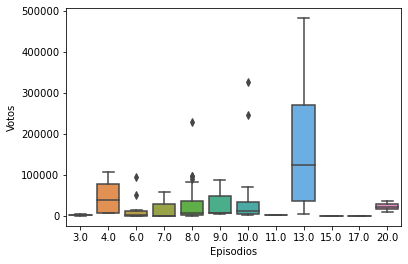

In [ ]:
sns.boxplot(data=dados, x="Episodios", y="Votos")

<AxesSubplot:xlabel='user_reviews', ylabel='Votos'>

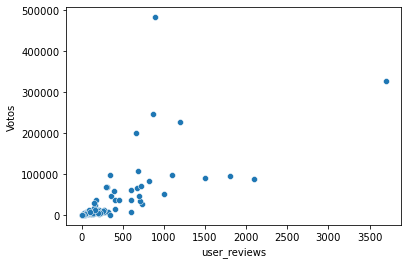

In [ ]:
sns.scatterplot(data=dados, x="user_reviews", y="Votos")

<AxesSubplot:xlabel='critic_reviews', ylabel='Votos'>

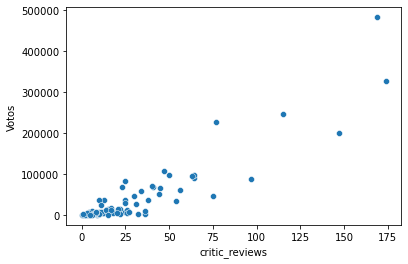

In [ ]:
sns.scatterplot(data=dados, x="critic_reviews", y="Votos")

# Duração

<AxesSubplot:xlabel='Duração', ylabel='Count'>

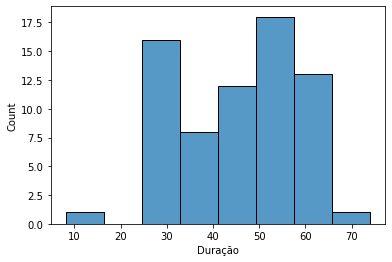

In [ ]:
sns.histplot(data=dados, x="Duração")# tratar (dividir duracao por numero de episodios para >100)

<AxesSubplot:xlabel='Duração'>

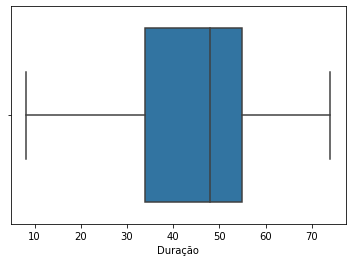

In [ ]:
sns.boxplot(data=dados, x="Duração")# tratar (dividir duracao por numero de episodios para >100)

<AxesSubplot:xlabel='Duração', ylabel='Votos'>

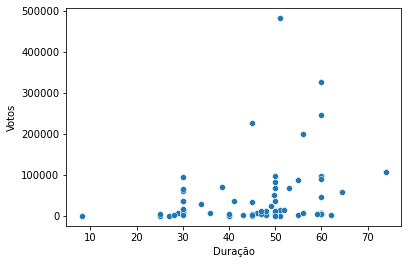

In [ ]:
sns.scatterplot(data=dados, x="Duração", y="Votos")

<AxesSubplot:xlabel='Ano', ylabel='Duração'>

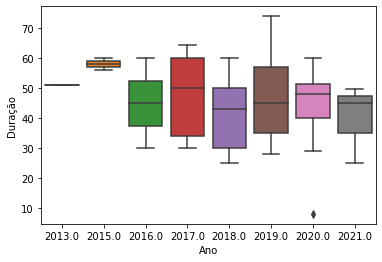

In [ ]:
sns.boxplot(data=dados, x="Ano", y="Duração")

<AxesSubplot:xlabel='Check', ylabel='Duração'>

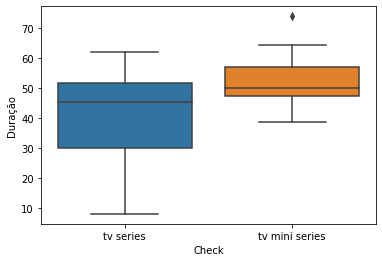

In [ ]:
sns.boxplot(data=dados, x="Check", y="Duração")

# Ano

<AxesSubplot:xlabel='Ano', ylabel='Count'>

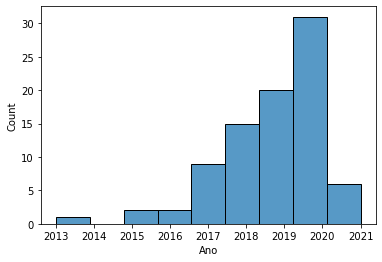

In [ ]:
sns.histplot(data=dados, x="Ano")# tratar (dividir duracao por numero de episodios para >100)

<AxesSubplot:xlabel='Ano'>

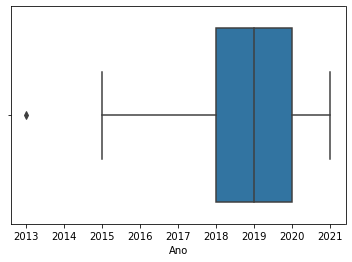

In [ ]:
sns.boxplot(data=dados, x="Ano")# tratar (dividir duracao por numero de episodios para >100)

# Data de estréia

<AxesSubplot:xlabel='mes', ylabel='count'>

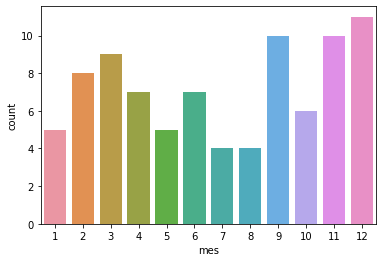

In [ ]:
sns.countplot(data=dados, x="mes")

# País

In [ ]:
dados['País'].value_counts()

United States                                     34
Germany                                            5
South Korea                                        5
Brazil                                             5
United Kingdom                                     5
India                                              4
Turkey                                             2
Spain                                              2
Mexico, United States                              2
Japan                                              2
France                                             2
Colombia                                           2
Taiwan                                             2
Mexico                                             2
Sweden                                             1
Argentina                                          1
India, United States                               1
Chile, Italy                                       1
Lebanon                                       

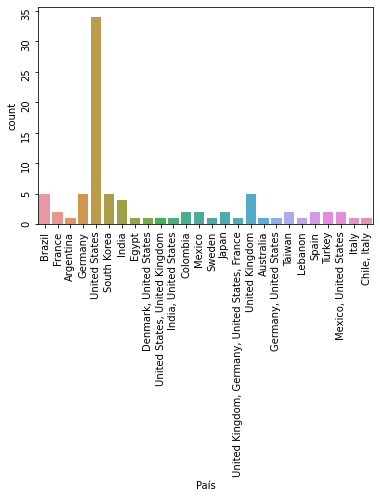

In [ ]:
fig, ax = plt.subplots()
sns.countplot(data=dados, x="País")
ax.tick_params(rotation=90)


# Idiomas

In [ ]:
dados['Idiomas'].value_counts()

English                                              42
Spanish                                               7
Portuguese                                            5
Korean                                                4
German                                                4
Hindi                                                 3
French                                                2
Japanese                                              1
Mandarin, English                                     1
Swedish                                               1
Mandarin, Min Nan                                     1
German, English, Yiddish, Arabic, Polish, Russian     1
Turkish, Arabic, Kurdish                              1
Tamil                                                 1
French, English                                       1
Italian                                               1
Danish                                                1
English, Italian, Spanish                       

<AxesSubplot:xlabel='Idiomas', ylabel='count'>

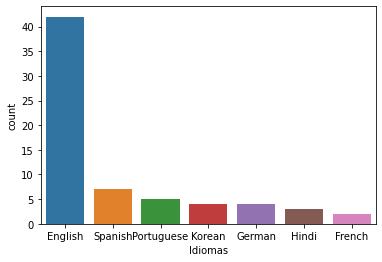

In [ ]:
sns.countplot(data=dados, x="Idiomas", order=dados.Idiomas.value_counts().iloc[:7].index)

#visCausaMorte = sns.countplot(x="CAUSABAS", order=dados.CAUSABAS.value_counts().iloc[:10].index, data=dados, palette="Set1")

# Episodios

<AxesSubplot:xlabel='Episodios', ylabel='Count'>

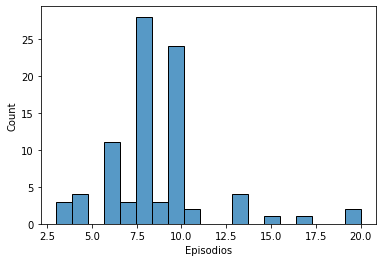

In [ ]:
sns.histplot(data=dados, x="Episodios")# tratar (dividir duracao por numero de episodios para >100)

<AxesSubplot:xlabel='Check', ylabel='Episodios'>

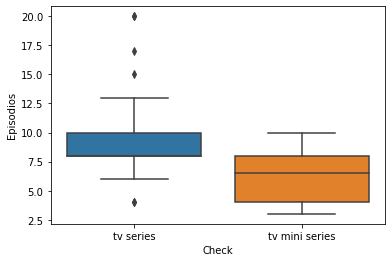

In [ ]:
sns.boxplot(data=dados, x="Check", y="Episodios")

## Reviews de usuários

<AxesSubplot:xlabel='user_reviews', ylabel='Count'>

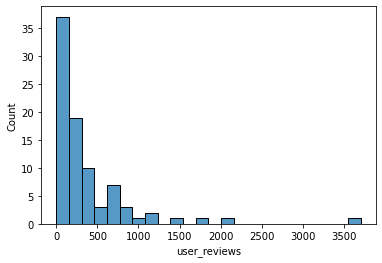

In [ ]:
sns.histplot(data=dados, x="user_reviews")

<AxesSubplot:xlabel='Ano', ylabel='user_reviews'>

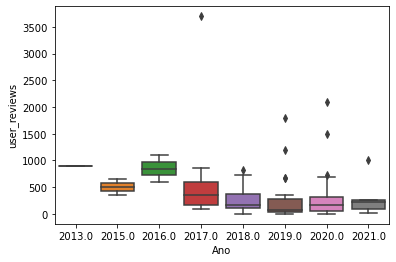

In [ ]:
sns.boxplot(data=dados, x = "Ano",y="user_reviews")

## Reviews de críticos

<AxesSubplot:xlabel='critic_reviews', ylabel='Count'>

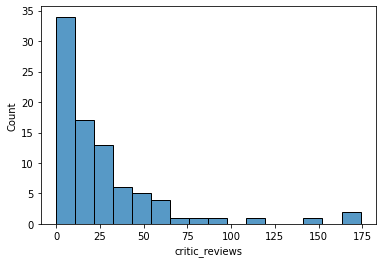

In [ ]:
sns.histplot(data=dados, x="critic_reviews")

<AxesSubplot:xlabel='Ano', ylabel='critic_reviews'>

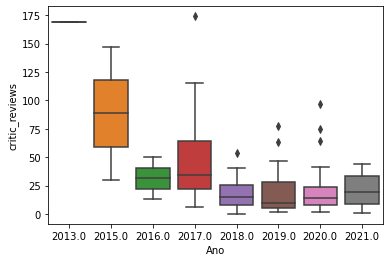

In [ ]:
sns.boxplot(data=dados, x = "Ano",y="critic_reviews")

# Engajamento (counts)

<AxesSubplot:xlabel='CountTotal', ylabel='Count'>

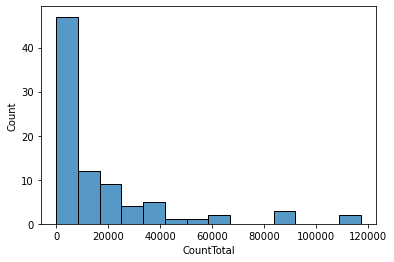

In [ ]:
sns.histplot(data=dados, x="CountTotal")

<AxesSubplot:xlabel='CountPre', ylabel='Count'>

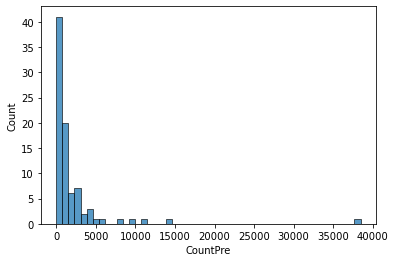

In [ ]:
sns.histplot(data=dados, x="CountPre")

<AxesSubplot:xlabel='CountDurante', ylabel='Count'>

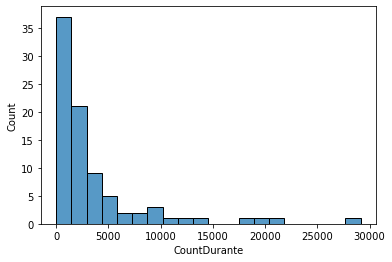

In [ ]:
sns.histplot(data=dados, x="CountDurante")

<AxesSubplot:xlabel='CountPos', ylabel='Count'>

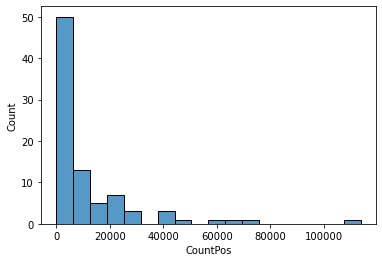

In [ ]:
sns.histplot(data=dados, x="CountPos")

<AxesSubplot:xlabel='Ano', ylabel='CountTotal'>

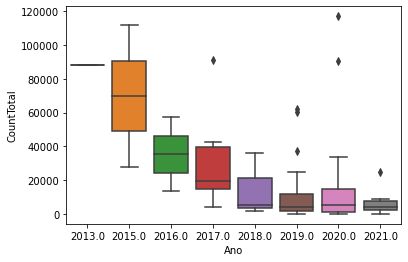

In [ ]:
sns.boxplot(data=dados, x="Ano", y="CountTotal")

In [ ]:
def getCount(tipocount):
    y = []
    coluna = []
    for i in range (24,dados.columns.size,1):
        coluna.append(str(dados.columns[i]))
        
        aux = []
        for j in range (0, len(dados[dados[coluna[-1]] == 1][tipocount]),1):
            aux.append(dados[dados[coluna[-1]] == 1][tipocount].values[j])
            
        y.append(aux)

    colunas = {'Count':[], 'Gênero':[]}
    df_aux = pd.DataFrame(colunas)

    for i in range(len(y)):
        for val in y[i]:
            linha = {'Count':val, 'Gênero':coluna[i]}
            df_aux = df_aux.append(linha, ignore_index=True)

    return df_aux

dfTotal = getCount("CountTotal")



In [ ]:
dfTotal

,Count,Gênero
0,39694.0,Adventure
1,117117.0,Adventure
2,7560.0,Adventure
3,459.0,Adventure
4,3311.0,Adventure
...,...,...
229,19642.0,mes
230,17568.0,mes
231,1659.0,mes
232,32659.0,mes


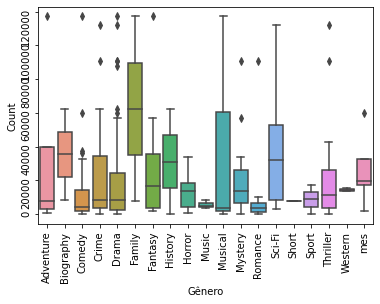

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(x='Gênero',y='Count', data=dfTotal)
ax.tick_params(rotation=90)

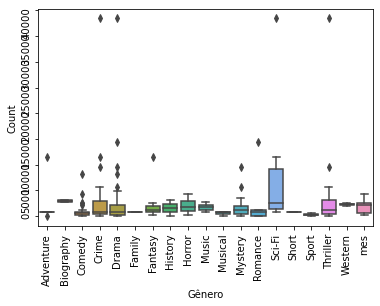

In [ ]:
dfPre = getCount("CountPre")
fig, ax = plt.subplots()
sns.boxplot(x='Gênero',y='Count', data=dfPre)
ax.tick_params(rotation=90)

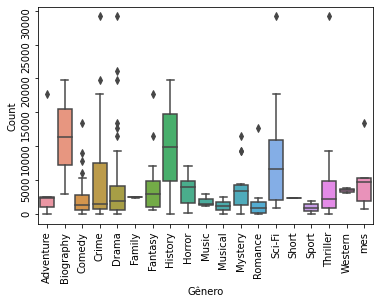

In [ ]:
dfDurante = getCount("CountDurante")
fig, ax = plt.subplots()
sns.boxplot(x='Gênero',y='Count', data=dfDurante)
ax.tick_params(rotation=90)

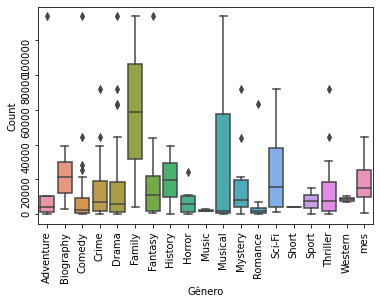

In [ ]:
dfPos = getCount("CountPos")
fig, ax = plt.subplots()
sns.boxplot(x='Gênero',y='Count', data=dfPos)
ax.tick_params(rotation=90)

<AxesSubplot:xlabel='mes', ylabel='CountTotal'>

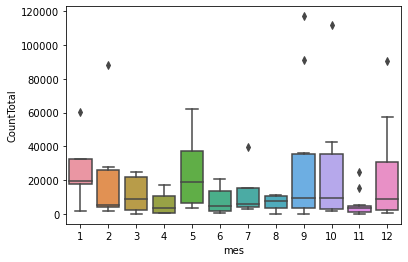

In [186]:
sns.boxplot(data=dados, x="mes", y="CountTotal")

<AxesSubplot:xlabel='mes', ylabel='CountPre'>

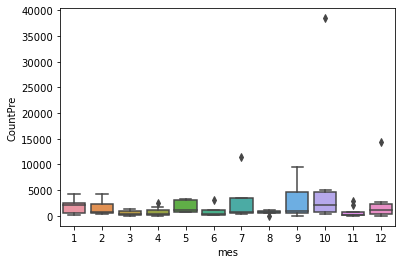

In [187]:
sns.boxplot(data=dados, x="mes", y="CountPre")

<AxesSubplot:xlabel='mes', ylabel='CountDurante'>

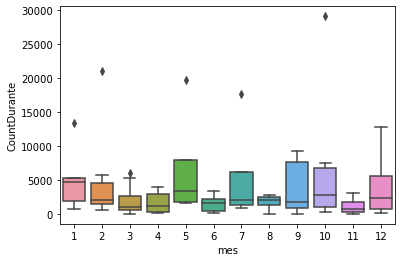

In [191]:
sns.boxplot(data=dados, x="mes", y="CountDurante")


<AxesSubplot:xlabel='mes', ylabel='CountPos'>

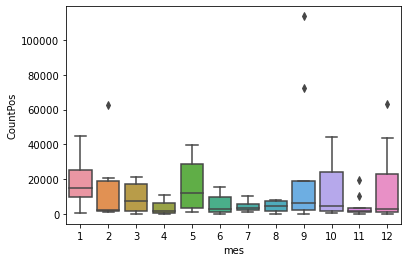

In [190]:
sns.boxplot(data=dados, x="mes", y="CountPos")

<AxesSubplot:xlabel='Check', ylabel='CountTotal'>

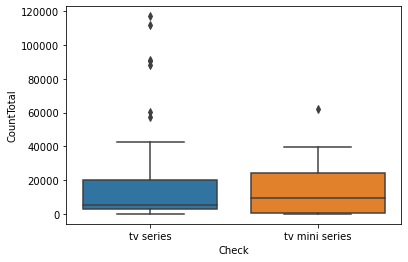

In [193]:
sns.boxplot(data=dados, x="Check", y="CountTotal")

<AxesSubplot:xlabel='Episodios', ylabel='CountTotal'>

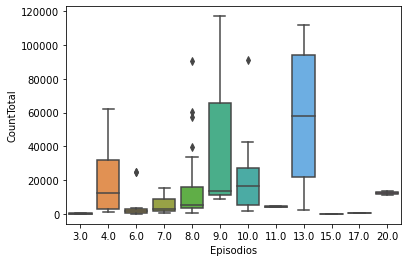

In [194]:
sns.boxplot(data=dados, x="Episodios", y="CountTotal")

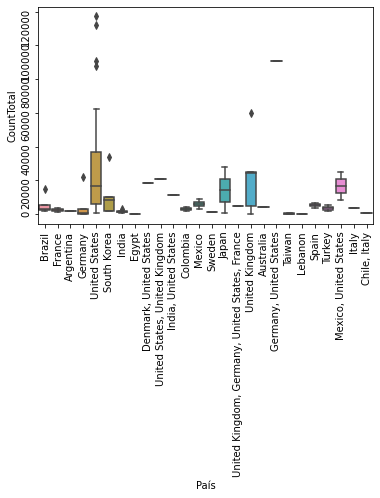

In [201]:
fig, ax = plt.subplots()
sns.boxplot(data=dados, x="País", y="CountTotal")
ax.tick_params(rotation=90)

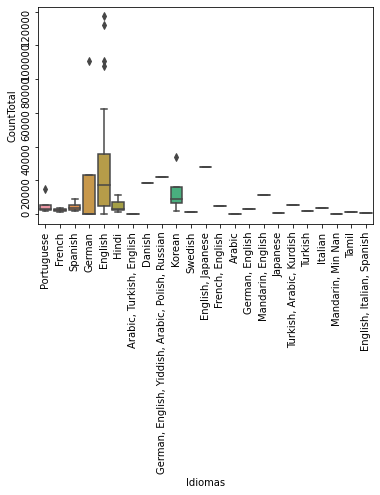

In [200]:
fig, ax = plt.subplots()
sns.boxplot(data=dados, x="Idiomas", y="CountTotal")
ax.tick_params(rotation=90)

# Série Temporal do engajamento

### Número e duração de episódios por engajamento

<AxesSubplot:xlabel='Episodios', ylabel='CountTotal'>

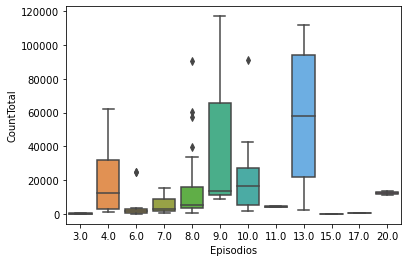

In [206]:
#sns.boxplot(data=dados, x="Episodios", y="CountTotal")

<AxesSubplot:xlabel='Duração', ylabel='CountTotal'>

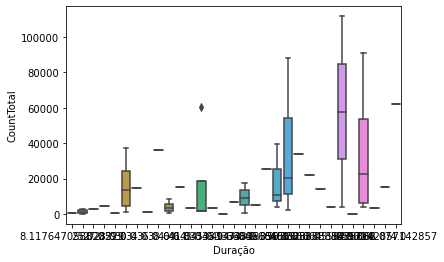

In [207]:
#sns.boxplot(data=dados, x="Duração", y="CountTotal")

In [205]:
dados[dados['Duração']>100] #corrigir, pegar a media por episodio (duracao/episodios)

,Titulo,Check,IMDBid,Nota,Votos,Elenco,Gênero,Duração,Ano,Data de estréia,...,Episodios,Nome,DataEstreia,CountPre,CountDurante,CountPos,CountTotal,user_reviews,critic_reviews,mes


## Atores e engajamento

## Influência de engajamento anterior no posterior

In [ ]:
sns.scatterplot(data=dados, x="CountPre", y="CountDurante")

In [ ]:
sns.scatterplot(data=dados[dados['Titulo']!="Stranger Things"], x="CountDurante", y="CountPos")

## Engajamento e genêro

In [ ]:
dados['Gênero'] = dados['Gênero'].apply(lambda x : x.split(", "))
dados['Gênero']

In [ ]:
pd.get_dummies(dados['Gênero'].apply(pd.Series).stack()).sum(level=0)
# Primeiramente: Fazer o count, ver a frequencia de cada série
# Segundamente: Avaliar os grupos mais frequentes (Drama+Comedia)

## Censura e engajamento

## Reviews e engajamento